# 1. Mini Project Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('C:/Users/Lenovo/Documents/Mini Project 3 - Mini Project Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning/marketing_campaign_data.csv')

In [3]:
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [3]:
categoricals = ['Education', 'Marital_Status', 'Dt_Customer']

numericals = ['Unnamed: 0', 'ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 
             'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
             'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AccepetedCmp3', 
             'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 
             'Response']

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9256\3719097352.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9256\3719097352.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


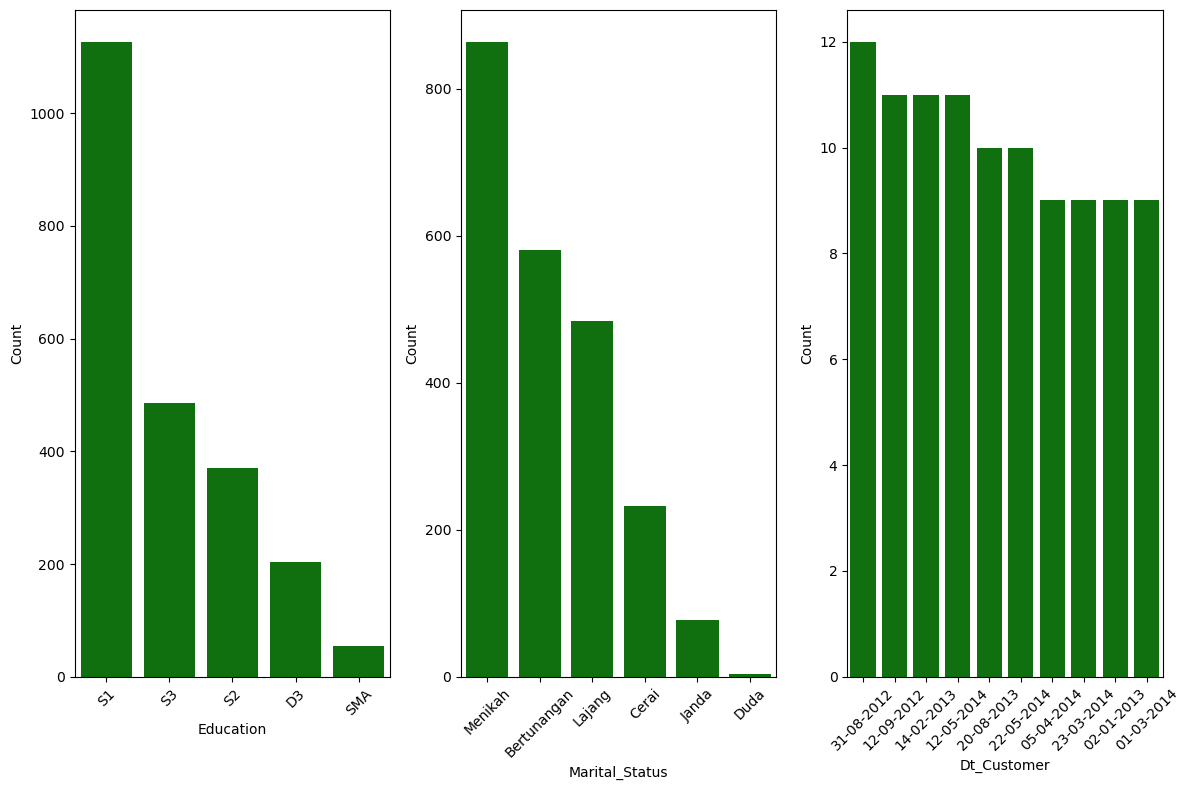

In [5]:
features = categoricals
plt.figure(figsize=(12, 8)) 

for i in range (0, len(features)): 
    plt.subplot(1, len(features), i+1)
    data = df[features[i]].value_counts().head(10)
    sns.barplot(x=data.index, y=data.values, color='green')
    plt.xticks(rotation=45)
    plt.xlabel(features[i])
    plt.ylabel('Count')
    plt.tight_layout()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

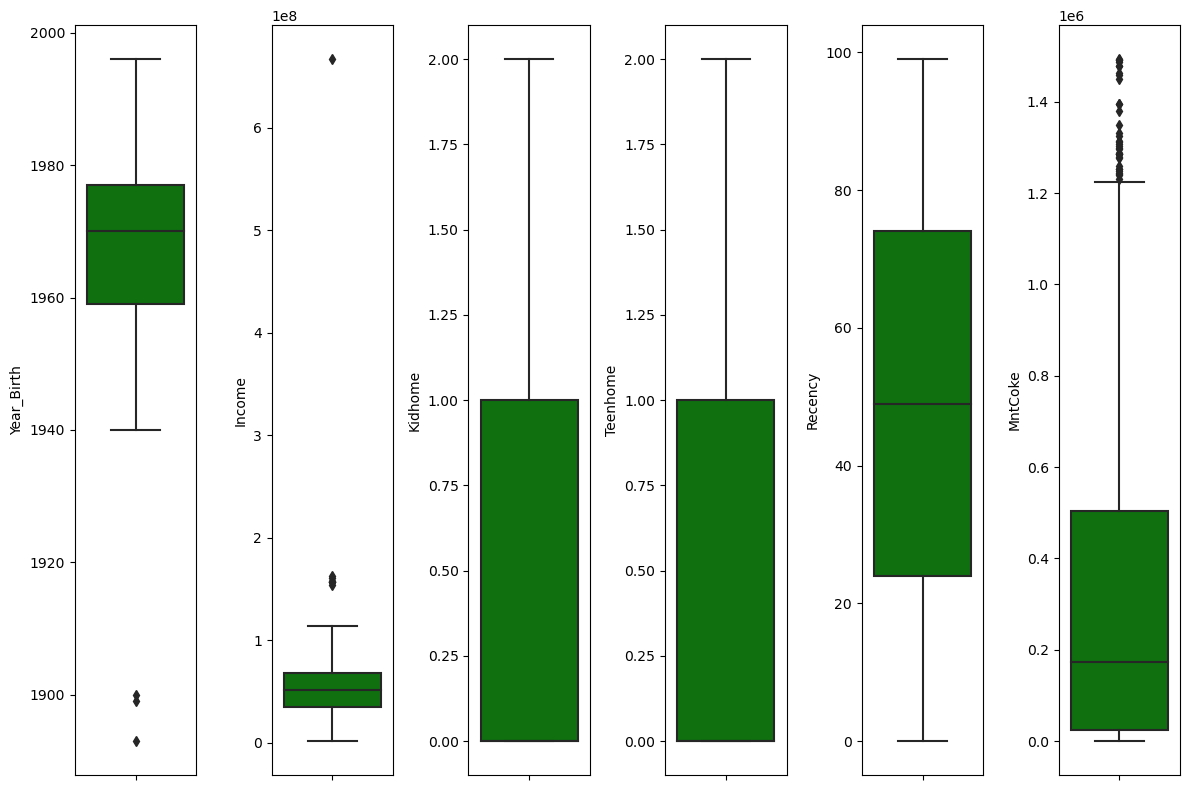

In [11]:
numericals = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke']
plt.figure(figsize=(12, 8)) 
for i in range (0, len(numericals)): 
                plt.subplot(1, len(numericals), i+1) 
                sns.boxplot(y=df[numericals[i]], color='green', orient='v') 
                plt.tight_layout()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

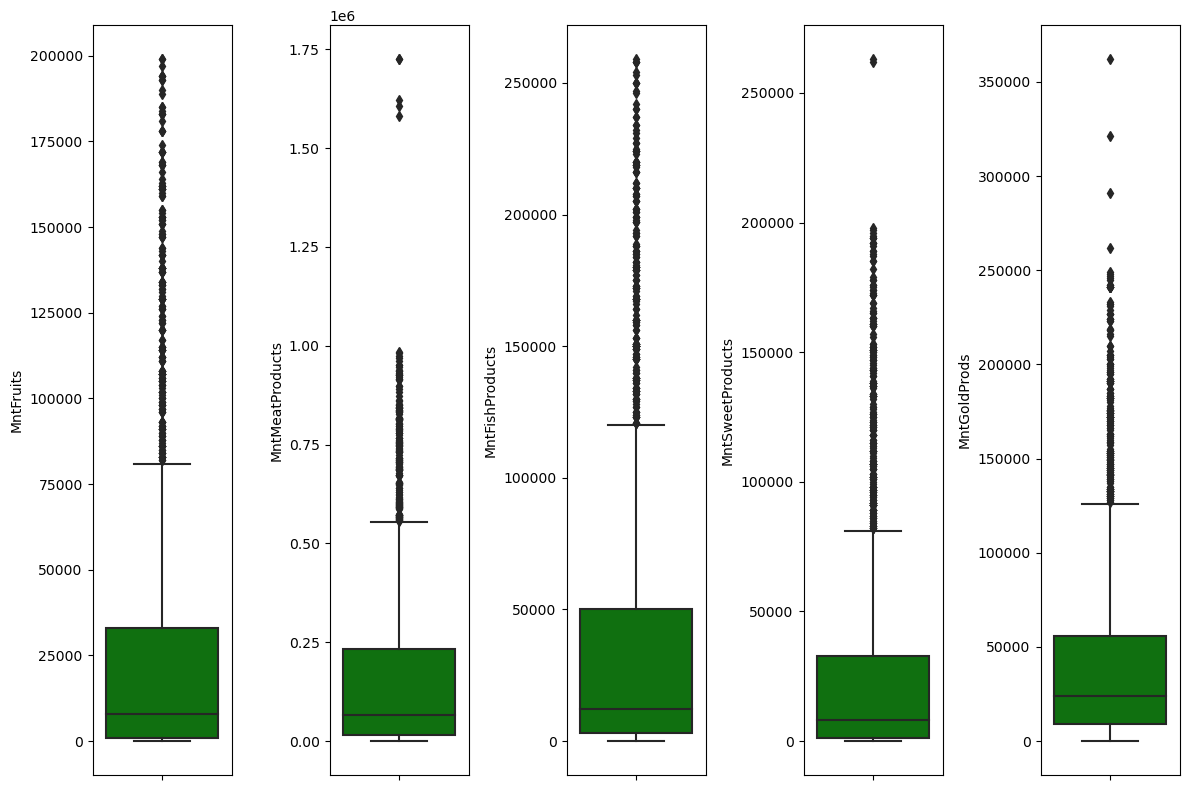

In [15]:
numericals = ['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
plt.figure(figsize=(12, 8))
for i in range(0, len(numericals)):
    plt.subplot(1, len(numericals), i+1)
    sns.boxplot(y=df[numericals[i]], color = 'green', orient = 'v')
    plt.tight_layout()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

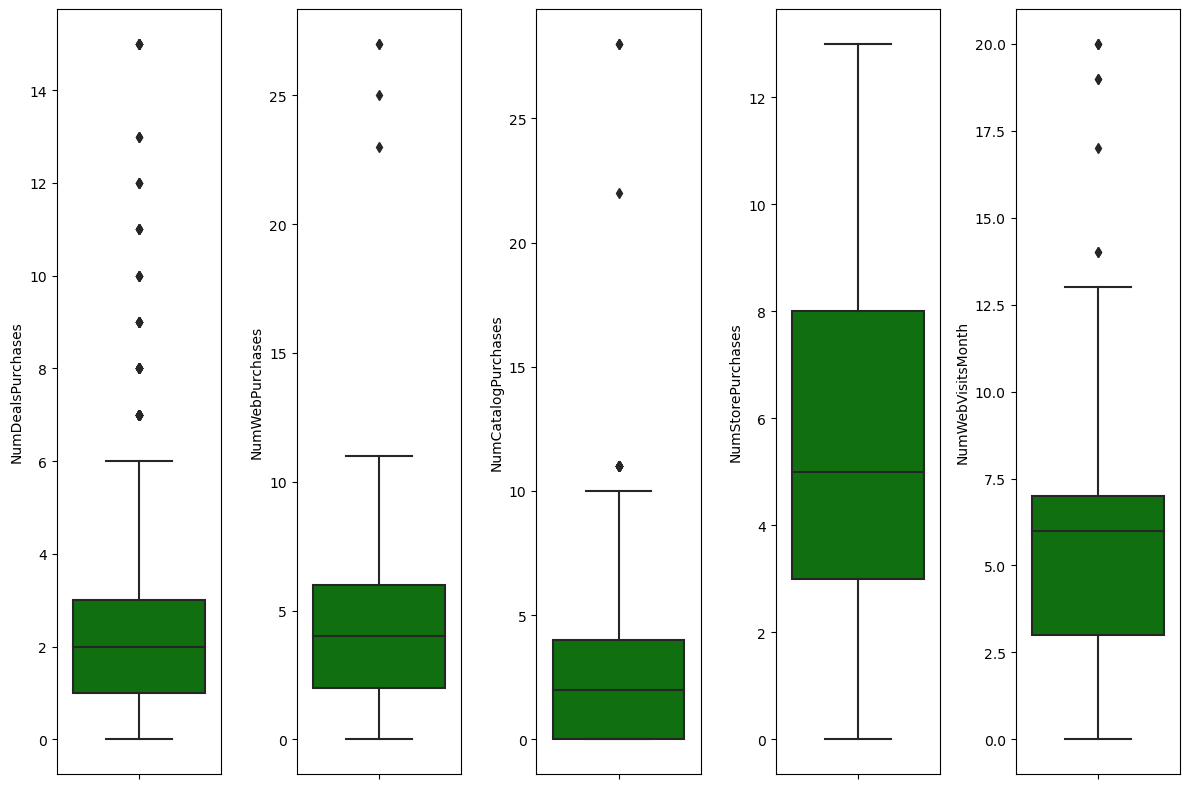

In [16]:
numericals = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
plt.figure(figsize=(12, 8))
for i in range(0, len(numericals)):
    plt.subplot(1, len(numericals), i+1)
    sns.boxplot(y=df[numericals[i]], color='green', orient='v')
    plt.tight_layout()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

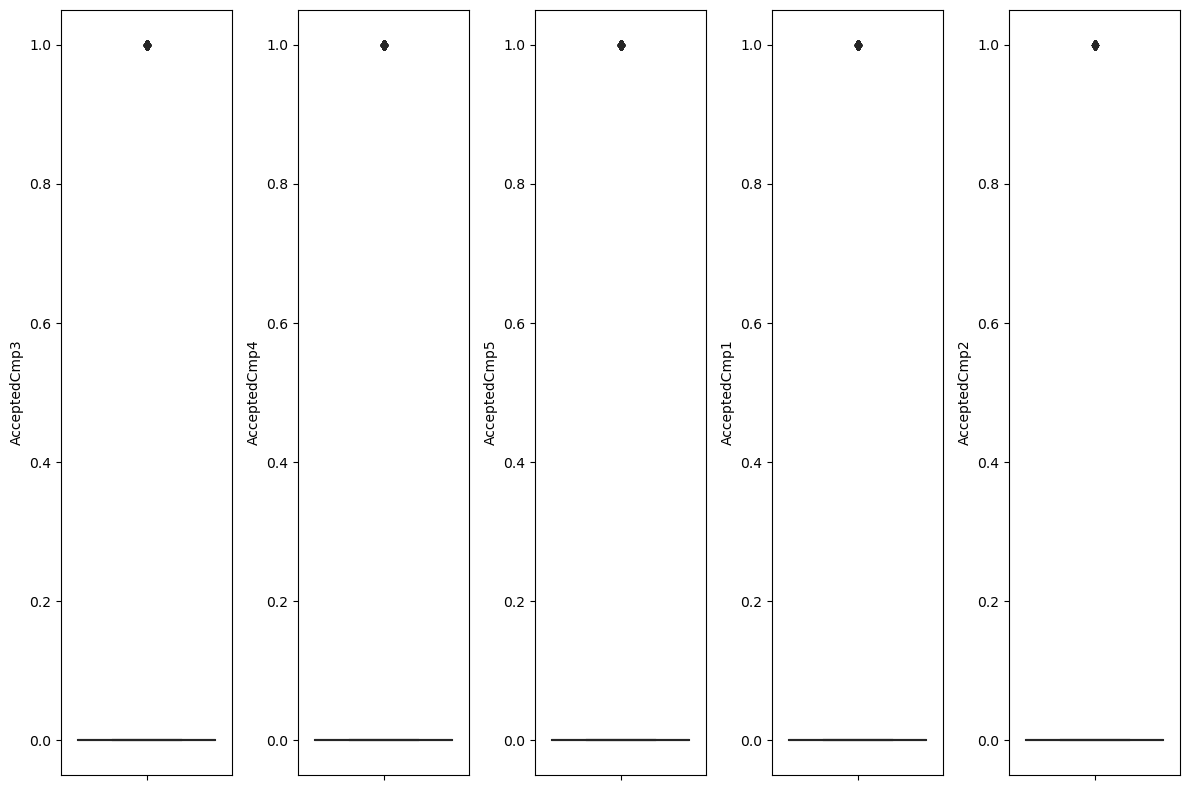

In [19]:
numericals = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']
plt.figure(figsize=(12, 8))
for i in range (0, len(numericals)):
    plt.subplot(1, len(numericals), i+1) 
    sns.boxplot(y=df[numericals[i]], color='green', orient='v')
    plt.tight_layout()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

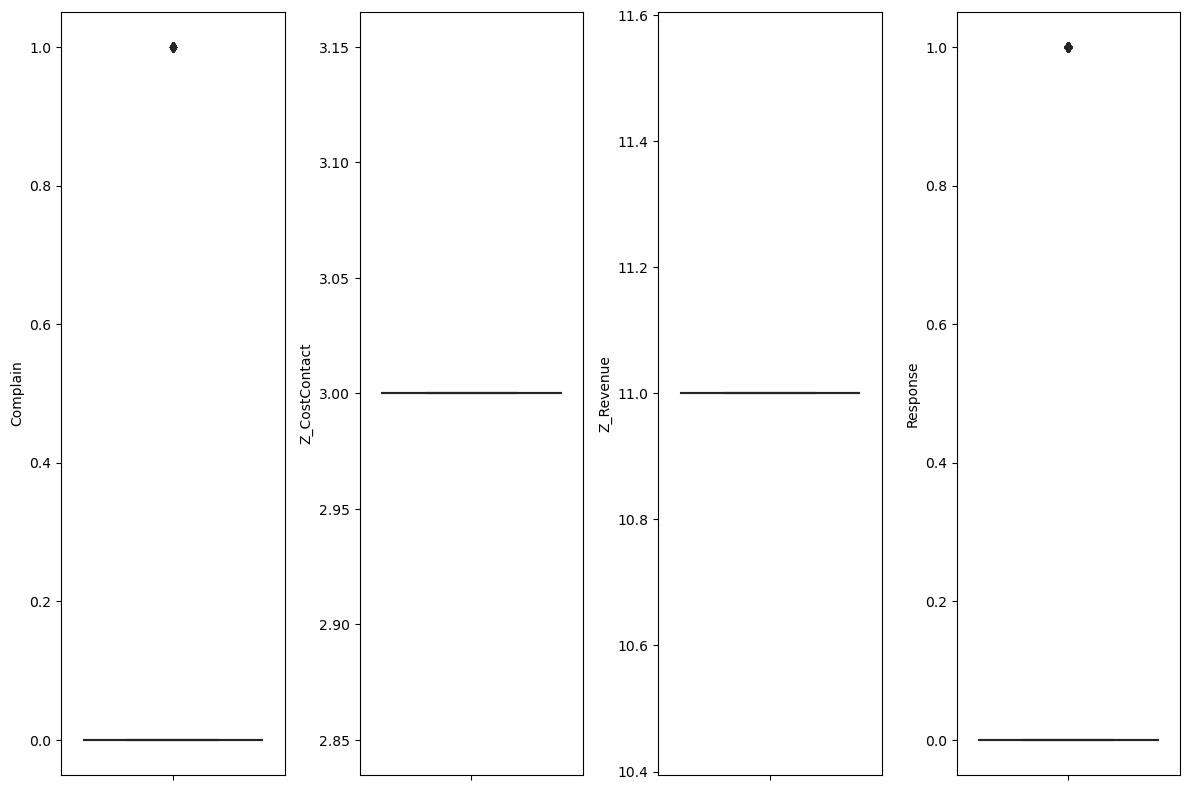

In [20]:
numericals = ['Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
plt.figure(figsize=(12, 8))
for i in range(0, len(numericals)):
    plt.subplot(1, len(numericals), i+1)
    sns.boxplot(y=df[numericals[i]], color='green', orient='v')
    plt.tight_layout()

# 1. Data Cleansing and Processing

### 1a. Handling Missing Values

In [4]:
df.isnull().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')
df['Income'].fillna(df['Income'].mean(), inplace=True)

In [6]:
df.isnull().sum()

Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

### 1b. Handling Duplicated 

In [7]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2240 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

### 1c. Handling Outlier

In [8]:
batas_atas = df['Income'].quantile(0.99)
outlier = df[df['Income'] > batas_atas]
df_cleaned = df[df['Income'] <= batas_atas]

In [9]:
batas_atas = df['MntCoke'].quantile(0.99)
outlier = df[df['MntCoke'] > batas_atas]
df_cleaned = df[df['MntCoke'] <= batas_atas]

In [10]:
batas_atas = df['MntFruits'].quantile(0.99)
outlier = df[df['MntFruits'] > batas_atas]
df_cleaned = df[df['MntFruits'] <= batas_atas]

In [11]:
batas_atas = df['MntMeatProducts'].quantile(0.99)
outlier = df[df['MntMeatProducts'] > batas_atas]
df_cleaned = df[df['MntMeatProducts'] <= batas_atas]

In [12]:
batas_atas = df['MntFishProducts'].quantile(0.99)
outlier = df[df['MntFishProducts'] > batas_atas]
df_cleaned = df[df['MntFishProducts'] <= batas_atas]

In [13]:
batas_atas = df['MntGoldProds'].quantile(0.99)
outlier = df[df['MntGoldProds'] > batas_atas]
df_cleaned = df[df['MntGoldProds'] <= batas_atas]

In [14]:
batas_atas = df['MntSweetProducts'].quantile(0.99)
outlier = df[df['MntSweetProducts'] > batas_atas]
df_cleaned = df[df['MntSweetProducts'] <= batas_atas]

In [15]:
batas_atas = df['NumDealsPurchases'].quantile(0.99)
outlier = df[df['NumDealsPurchases'] > batas_atas]
df_cleaned = df[df['MntSweetProducts'] <= batas_atas]

In [16]:
batas_atas = df['NumWebPurchases'].quantile(0.99)
outlier = df[df['NumWebPurchases'] > batas_atas]
df_cleaned = df[df['MntSweetProducts'] <= batas_atas]

In [17]:
batas_atas = df['NumCatalogPurchases'].quantile(0.99)
outlier = df[df['NumCatalogPurchases'] > batas_atas]
df_cleaned = df[df['NumCatalogPurchases'] <= batas_atas]

In [18]:
batas_atas = df['NumWebVisitsMonth'].quantile(0.99)
outlier = df[df['NumWebVisitsMonth'] > batas_atas]
df_cleaned = df[df['NumWebVisitsMonth'] <= batas_atas]

In [19]:
df_cleaned.to_csv("data_cleaned.csv", index=False)

In [20]:
df_cleaned.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0


### 1d. Membuang data yang tidak diperlukan

In [21]:
df = df.drop(columns=['Unnamed: 0'])

In [18]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,...,5,0,0,0,0,0,0,3,11,0


### 1e. Feature Encoding 

In [65]:
df['Education'].value_counts()

Education
S1     1127
S3      486
S2      370
D3      203
SMA      54
Name: count, dtype: int64

In [66]:
# 1e. Tingkat Pendidikan

mapping_education = { 'SMA' : 0, 
                     'D3' : 1, 
                    'S1' : 2, 
                    'S2' : 3, 
                    'S3' : 4 
                    }

df['Education'] = df['Education'].map(mapping_education)

In [67]:
df.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,...,NumWebVisitsMonth_norm,NumWebVisitsMonth_std,NumCatalogPurchases_norm,NumCatalogPurchases_std,NumWebPurchases_norm,NumWebPurchases_std,conversion_rate_norm,conversion_rate_std,Response_norm,Response_std
0,5524,1957,2,58138000.0,0,0,04-09-2012,58,635000,88000,...,0.35,0.693904,0.357143,2.510890,0.296296,1.409304,0.142857,0.693755,1.0,2.388846
1,2174,1954,2,46344000.0,1,1,08-03-2014,38,11000,1000,...,0.25,-0.130463,0.035714,-0.568720,0.037037,-1.110409,0.000000,-0.305605,0.0,-0.418612
2,4141,1965,2,71613000.0,0,0,21-08-2013,26,426000,49000,...,0.20,-0.542647,0.071429,-0.226541,0.296296,1.409304,0.000000,-0.305605,0.0,-0.418612
3,6182,1984,2,26646000.0,1,0,10-02-2014,26,11000,4000,...,0.30,0.281720,0.000000,-0.910898,0.074074,-0.750450,0.000000,-0.305605,0.0,-0.418612
4,5324,1981,4,58293000.0,1,0,19-01-2014,94,173000,43000,...,0.25,-0.130463,0.107143,0.115638,0.185185,0.329427,0.000000,-0.305605,0.0,-0.418612


In [23]:
df['Marital_Status'].value_counts()

Marital_Status
Menikah        864
Bertunangan    580
Lajang         484
Cerai          232
Janda           77
Duda             3
Name: count, dtype: int64

In [24]:
# 1e. Marital Status

df['Marital_Status'] = df['Marital_Status'].astype('category')

one_hot = pd.get_dummies(df['Marital_Status'], prefix='status')

df = pd.concat([df, one_hot], axis=1)


df = df.drop(columns=['Marital_Status'])

In [25]:
df.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,...,Complain,Z_CostContact,Z_Revenue,Response,status_Bertunangan,status_Cerai,status_Duda,status_Janda,status_Lajang,status_Menikah
0,5524,1957,S1,58138000.0,0,0,04-09-2012,58,635000,88000,...,0,3,11,1,False,False,False,False,True,False
1,2174,1954,S1,46344000.0,1,1,08-03-2014,38,11000,1000,...,0,3,11,0,False,False,False,False,True,False
2,4141,1965,S1,71613000.0,0,0,21-08-2013,26,426000,49000,...,0,3,11,0,True,False,False,False,False,False
3,6182,1984,S1,26646000.0,1,0,10-02-2014,26,11000,4000,...,0,3,11,0,True,False,False,False,False,False
4,5324,1981,S3,58293000.0,1,0,19-01-2014,94,173000,43000,...,0,3,11,0,False,False,False,False,False,True


# 2. Feature Engineering 

In [26]:
df['conversion_rate'] = df['Response'] / df['NumWebVisitsMonth']

In [27]:
df.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,...,Z_CostContact,Z_Revenue,Response,status_Bertunangan,status_Cerai,status_Duda,status_Janda,status_Lajang,status_Menikah,conversion_rate
0,5524,1957,S1,58138000.0,0,0,04-09-2012,58,635000,88000,...,3,11,1,False,False,False,False,True,False,0.142857
1,2174,1954,S1,46344000.0,1,1,08-03-2014,38,11000,1000,...,3,11,0,False,False,False,False,True,False,0.000000
2,4141,1965,S1,71613000.0,0,0,21-08-2013,26,426000,49000,...,3,11,0,True,False,False,False,False,False,0.000000
3,6182,1984,S1,26646000.0,1,0,10-02-2014,26,11000,4000,...,3,11,0,True,False,False,False,False,False,0.000000
4,5324,1981,S3,58293000.0,1,0,19-01-2014,94,173000,43000,...,3,11,0,False,False,False,False,False,True,0.000000


## 2a. Feature Engineering : conversion Rate

In [28]:
df['Age'] = 2014 - df['Year_Birth']

In [29]:
df.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,...,Z_Revenue,Response,status_Bertunangan,status_Cerai,status_Duda,status_Janda,status_Lajang,status_Menikah,conversion_rate,Age
0,5524,1957,S1,58138000.0,0,0,04-09-2012,58,635000,88000,...,11,1,False,False,False,False,True,False,0.142857,57
1,2174,1954,S1,46344000.0,1,1,08-03-2014,38,11000,1000,...,11,0,False,False,False,False,True,False,0.000000,60
2,4141,1965,S1,71613000.0,0,0,21-08-2013,26,426000,49000,...,11,0,True,False,False,False,False,False,0.000000,49
3,6182,1984,S1,26646000.0,1,0,10-02-2014,26,11000,4000,...,11,0,True,False,False,False,False,False,0.000000,30
4,5324,1981,S3,58293000.0,1,0,19-01-2014,94,173000,43000,...,11,0,False,False,False,False,False,True,0.000000,33


In [30]:
df['Age'].min()

18

In [31]:
df['Age'].max()

121

In [31]:
df.describe()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,conversion_rate,Age
count,2240.000000,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2229.000000,2240.000000
mean,5592.159821,1968.805804,2.460268,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,...,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,0.043686,45.194196
std,3246.662198,11.984069,1.004337,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,...,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,0.142981,11.984069
min,0.000000,1893.000000,0.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,18.000000
25%,2828.250000,1959.000000,2.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,37.000000
50%,5458.500000,1970.000000,2.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,44.000000
75%,8427.750000,1977.000000,3.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,55.000000
max,11191.000000,1996.000000,4.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,1.000000,121.000000


In [32]:
age_mean = df['Age'].mean() 

In [33]:
def mapping_age(Age): 
    if Age < age_mean :
        return 'muda'
    elif Age == age_mean :
        return 'dewasa'
    else:
        return 'lansia'
        
df['Age_Category'] = df['Age'].map(mapping_age)

In [34]:
mapping_age = { 'muda' : 0, 
          'dewasa' : 1, 
          'lansia' : 2 } 

df['Age_Category'] = df['Age_Category'].map(mapping_age)

In [35]:
df.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,...,Response,status_Bertunangan,status_Cerai,status_Duda,status_Janda,status_Lajang,status_Menikah,conversion_rate,Age,Age_Category
0,5524,1957,S1,58138000.0,0,0,04-09-2012,58,635000,88000,...,1,False,False,False,False,True,False,0.142857,57,2
1,2174,1954,S1,46344000.0,1,1,08-03-2014,38,11000,1000,...,0,False,False,False,False,True,False,0.000000,60,2
2,4141,1965,S1,71613000.0,0,0,21-08-2013,26,426000,49000,...,0,True,False,False,False,False,False,0.000000,49,2
3,6182,1984,S1,26646000.0,1,0,10-02-2014,26,11000,4000,...,0,True,False,False,False,False,False,0.000000,30,0
4,5324,1981,S3,58293000.0,1,0,19-01-2014,94,173000,43000,...,0,False,False,False,False,False,True,0.000000,33,0


# 3. Plot hubungan conversation rate dan jenis user

In [36]:
cv_rate_age = df.groupby(['Age_Category'])['Response'].value_counts(normalize=True)[:,1]
print('ratio berdasarkan kategori umur')
print(cv_rate_age)

ratio berdasarkan kategori umur
Age_Category
0    0.158704
2    0.137313
Name: proportion, dtype: float64


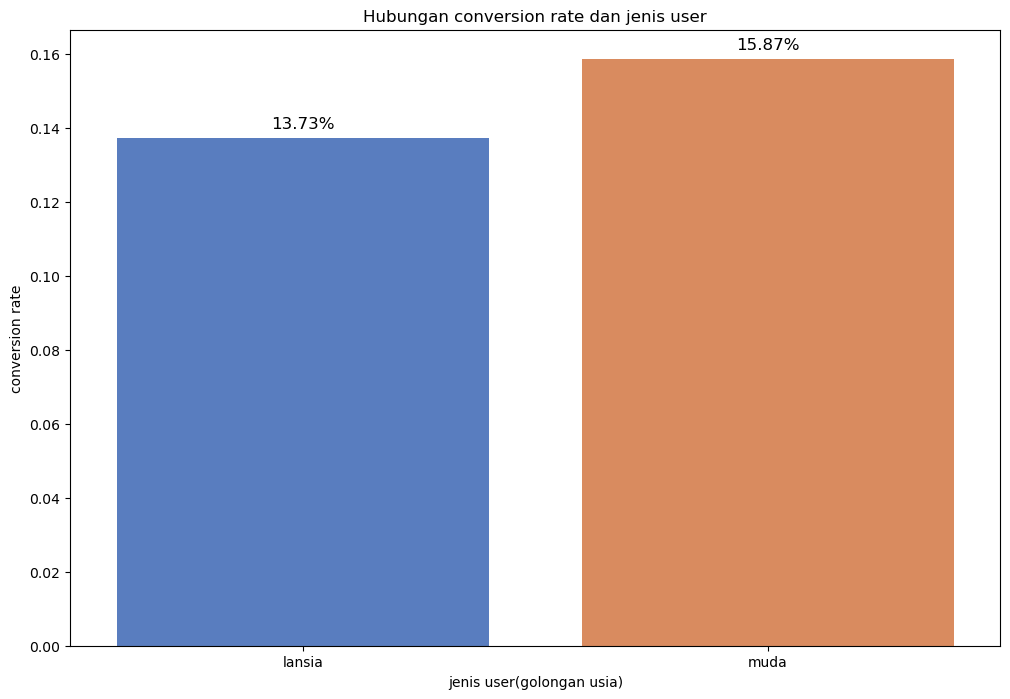

In [36]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=cv_rate_age.index, y=cv_rate_age, palette='muted')

for i in ax.patches:
    ax.annotate(f'{i.get_height():.2%}', (i.get_x() + i.get_width() / 2., i.get_height()), ha='center', va='center', 
               fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

plt.xlabel('jenis user(golongan usia)')
plt.ylabel('conversion rate')
plt.title('Hubungan conversion rate dan jenis user')

plt.show()

Berdasarkan data diatas menunjukkan user/customer dengan golongan usia muda lebih responsif atau aktif 
untuk kunjungan website daripada user/customer usia lansia hal ini dikarenakan user/customer usia muda 
memiliki keinginan konsumtif lebih tinggi daripada usia lansia.

In [37]:
cv_ratio_age = df.groupby(['Age_Category'])['conversion_rate'].value_counts(normalize=True)[:,1]
print('ratio berdasarkan kategori umur')
print(cv_ratio_age)

ratio berdasarkan kategori umur
Age_Category
0    0.013821
2    0.013013
Name: proportion, dtype: float64


In [38]:
income_mean = df['Income'].mean()

In [39]:
def mapping_income(Income): 
    if Income < income_mean :
        return 'low_income'
    elif Income == income_mean :
        return 'middle_income'
    else:
        return 'high_income'
        
df['Income_Category'] = df['Income'].map(mapping_income)

In [40]:
df.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,...,status_Bertunangan,status_Cerai,status_Duda,status_Janda,status_Lajang,status_Menikah,conversion_rate,Age,Age_Category,Income_Category
0,5524,1957,S1,58138000.0,0,0,04-09-2012,58,635000,88000,...,False,False,False,False,True,False,0.142857,57,2,high_income
1,2174,1954,S1,46344000.0,1,1,08-03-2014,38,11000,1000,...,False,False,False,False,True,False,0.000000,60,2,low_income
2,4141,1965,S1,71613000.0,0,0,21-08-2013,26,426000,49000,...,True,False,False,False,False,False,0.000000,49,2,high_income
3,6182,1984,S1,26646000.0,1,0,10-02-2014,26,11000,4000,...,True,False,False,False,False,False,0.000000,30,0,low_income
4,5324,1981,S3,58293000.0,1,0,19-01-2014,94,173000,43000,...,False,False,False,False,False,True,0.000000,33,0,high_income


In [41]:
income_rate = df.groupby(['Income_Category'])['Response'].value_counts(normalize=True)[:,1]
print('ratio berdasarkan kategori pendapatan')
print(income_rate)

ratio berdasarkan kategori pendapatan
Income_Category
high_income      0.189114
low_income       0.113074
middle_income    0.041667
Name: proportion, dtype: float64


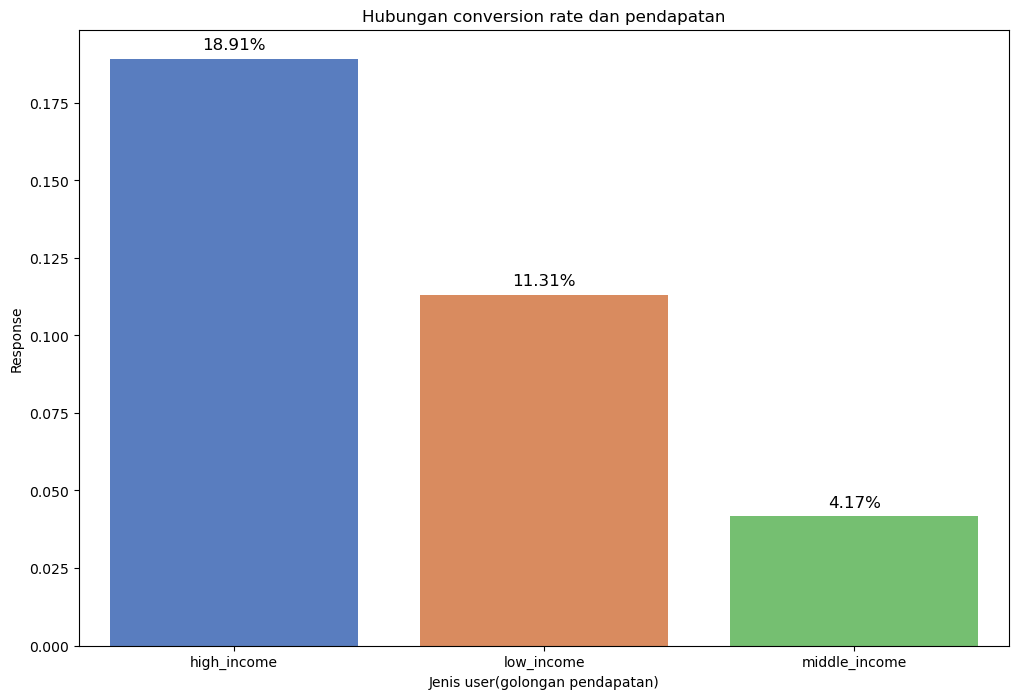

In [43]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=income_rate.index, y=income_rate, palette='muted')

for i in ax.patches:
    ax.annotate(f'{i.get_height():.2%}', (i.get_x() + i.get_width() / 2., i.get_height()), ha='center', va='center', 
               fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Jenis user(golongan pendapatan)')
plt.ylabel('Response')
plt.title('Hubungan conversion rate dan pendapatan')

plt.show()

Berdasarkan data diatas user/customer dengan pendapatan tinggi lebih banyak melakukan kunjungan 
ke website perusahaan. Hal menarik, pada data ini user/customer dengan pendapatan dibawah rata-rata
melakukan kunjungan lebih tinggi daripada user/customer dengan pendapatan menengah, hal ini terjadi 
dikarenakan, user/customer pendapatan rendah melakukan kunjungan untuk mencari produk dengan harga 
murah atau diskon.

In [42]:
df['Total_spending'] = df[['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]].sum(axis=1)

In [43]:
df.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,...,status_Cerai,status_Duda,status_Janda,status_Lajang,status_Menikah,conversion_rate,Age,Age_Category,Income_Category,Total_spending
0,5524,1957,S1,58138000.0,0,0,04-09-2012,58,635000,88000,...,False,False,False,True,False,0.142857,57,2,high_income,1617000
1,2174,1954,S1,46344000.0,1,1,08-03-2014,38,11000,1000,...,False,False,False,True,False,0.000000,60,2,low_income,27000
2,4141,1965,S1,71613000.0,0,0,21-08-2013,26,426000,49000,...,False,False,False,False,False,0.000000,49,2,high_income,776000
3,6182,1984,S1,26646000.0,1,0,10-02-2014,26,11000,4000,...,False,False,False,False,False,0.000000,30,0,low_income,53000
4,5324,1981,S3,58293000.0,1,0,19-01-2014,94,173000,43000,...,False,False,False,False,True,0.000000,33,0,high_income,422000


In [44]:
spending_mean = df['Total_spending'].mean()

In [45]:
def mapping_spending(Total_spending): 
    if Total_spending < spending_mean :
        return 'low_spending'
    elif Total_spending > spending_mean :
        return 'high_spending'
    else:
        return 'middle_spending'
        
df['Spending_Category'] = df['Total_spending'].map(mapping_spending)

In [46]:
spending_rate = df.groupby(['Spending_Category'])['Response'].value_counts(normalize=True)[:,1]
print('ratio berdasarkan pengeluaran')
print(spending_rate)

ratio berdasarkan pengeluaran
Spending_Category
high_spending    0.221133
low_spending     0.099092
Name: proportion, dtype: float64


In [47]:
mapping_spending = { 'low_spending' : 0, 
          'middle_spending' : 1, 
          'high_spending' : 2 } 

df['Spending_Category'] = df['Spending_Category'].map(mapping_spending)

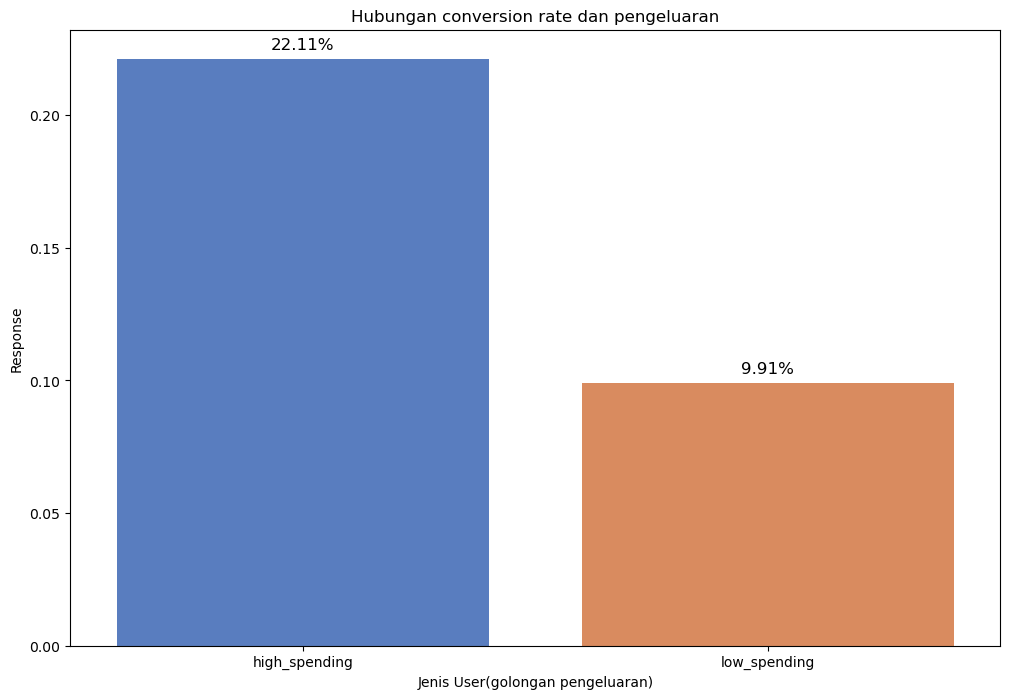

In [47]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=spending_rate.index, y=spending_rate, palette='muted')

for i in ax.patches:
    ax.annotate(f'{i.get_height():.2%}', (i.get_x() + i.get_width() / 2., i.get_height()), ha='center', va='center', 
               fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Jenis User(golongan pengeluaran)')
plt.ylabel('Response')
plt.title('Hubungan conversion rate dan pengeluaran')

plt.show()

Berdasarkan data diatas menunjukkan bahwa user/customer dengan high spending lebih sering 
mengunjungi website hal ini dikarenakan mereka lebih banyak berbelanja dengan menggunakan 
diskon atau mencari produk dengan harga murah.

# 4. Feature Scaling

In [48]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,conversion_rate,Age,Age_Category,Total_spending,Spending_Category
count,2240.000000,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,...,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2229.000000,2240.000000,2240.000000,2.240000e+03,2240.000000
mean,5592.159821,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,37525.446429,...,0.013393,0.009375,3.0,11.0,0.149107,0.043686,45.194196,0.897321,6.057982e+05,0.819643
std,3246.662198,11.984069,2.503780e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,54628.979403,...,0.114976,0.096391,0.0,0.0,0.356274,0.142981,11.984069,0.994937,6.022493e+05,0.983821
min,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,3.0,11.0,0.000000,0.000000,18.000000,0.000000,5.000000e+03,0.000000
25%,2828.250000,1959.000000,3.553875e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,3000.000000,...,0.000000,0.000000,3.0,11.0,0.000000,0.000000,37.000000,0.000000,6.875000e+04,0.000000
50%,5458.500000,1970.000000,5.174150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,12000.000000,...,0.000000,0.000000,3.0,11.0,0.000000,0.000000,44.000000,0.000000,3.960000e+05,0.000000
75%,8427.750000,1977.000000,6.828975e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,50000.000000,...,0.000000,0.000000,3.0,11.0,0.000000,0.000000,55.000000,2.000000,1.045500e+06,2.000000
max,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,...,1.000000,1.000000,3.0,11.0,1.000000,1.000000,121.000000,2.000000,2.525000e+06,2.000000


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7600\1759982252.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7600\1759982252.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


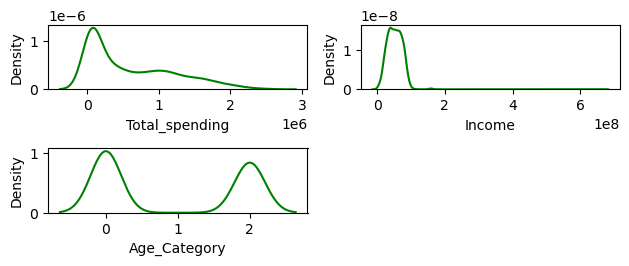

In [46]:
features = ['Total_spending', 'Income', 'Age_Category']
for i in range (0, len(features)):
    plt.subplot(4, 2, i+1)
    sns.kdeplot(x=df[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

In [49]:
df['Income_norm'] = MinMaxScaler().fit_transform(df['Income'].values.reshape(len(df), 1))
df['Income_std'] = StandardScaler().fit_transform(df['Income'].values.reshape(len(df), 1))

In [45]:
df[['Income', 'Income_norm', 'Income_std']].describe()

,Income,Income_norm,Income_std
count,2.240000e+03,2240.000000,2.240000e+03
mean,5.224725e+07,0.075973,1.078502e-16
std,2.503780e+07,0.037654,1.000223e+00
min,1.730000e+06,0.000000,-2.018090e+00
25%,3.553875e+07,0.050845,-6.674801e-01
50%,5.174150e+07,0.075213,-2.020403e-02
75%,6.828975e+07,0.100099,6.408743e-01
max,6.666660e+08,1.000000,2.454513e+01


In [50]:
df['Total_spending_norm'] = MinMaxScaler().fit_transform(df['Total_spending'].values.reshape(len(df), 1))
df['Total_spending_std'] = StandardScaler().fit_transform(df['Total_spending'].values.reshape(len(df), 1))

In [55]:
df[['Total_spending', 'Total_spending_norm', 'Total_spending_norm']]

,Total_spending,Total_spending_norm,Total_spending_norm
0,1617000,0.639683,0.639683
1,27000,0.008730,0.008730
2,776000,0.305952,0.305952
3,53000,0.019048,0.019048
4,422000,0.165476,0.165476
...,...,...,...
2235,1341000,0.530159,0.530159
2236,444000,0.174206,0.174206
2237,1241000,0.490476,0.490476
2238,843000,0.332540,0.332540


In [51]:
df['MntCoke_norm'] = MinMaxScaler().fit_transform(df['MntCoke'].values.reshape(len(df), 1))
df['MntCoke_std'] = StandardScaler().fit_transform(df['MntCoke'].values.reshape(len(df), 1))

In [58]:
df[['MntCoke', 'MntCoke_norm', 'MntCoke_std']].describe()

,MntCoke,MntCoke_norm,MntCoke_std
count,2.240000e+03,2240.000000,2.240000e+03
mean,3.039357e+05,0.203574,5.789020e-17
std,3.365974e+05,0.225450,1.000223e+00
min,0.000000e+00,0.000000,-9.031668e-01
25%,2.375000e+04,0.015908,-8.325919e-01
50%,1.735000e+05,0.116209,-3.875991e-01
75%,5.042500e+05,0.337743,5.952483e-01
max,1.493000e+06,1.000000,3.533390e+00


In [52]:
df['MntFruits_norm'] = MinMaxScaler().fit_transform(df['MntFruits'].values.reshape(len(df), 1))
df['MntFruits_std'] = StandardScaler().fit_transform(df['MntFruits'].values.reshape(len(df), 1))

In [60]:
df[['MntFruits', 'MntFruits_norm', 'MntFruits_std']].describe()

,MntFruits,MntFruits_norm,MntFruits_std
count,2240.000000,2240.000000,2.240000e+03
mean,26302.232143,0.132172,3.172066e-17
std,39773.433765,0.199867,1.000223e+00
min,0.000000,0.000000,-6.614492e-01
25%,1000.000000,0.005025,-6.363012e-01
50%,8000.000000,0.040201,-4.602650e-01
75%,33000.000000,0.165829,1.684356e-01
max,199000.000000,1.000000,4.343008e+00


In [53]:
df['MntMeatProducts_norm'] = MinMaxScaler().fit_transform(df['MntMeatProducts'].values.reshape(len(df), 1))
df['MntMeatProducts_std'] = StandardScaler().fit_transform(df['MntMeatProducts'].values.reshape(len(df), 1))

In [62]:
df[['MntMeatProducts', 'MntMeatProducts_norm', 'MntMeatProducts_std']].describe()

,MntMeatProducts,MntMeatProducts_norm,MntMeatProducts_std
count,2.240000e+03,2240.000000,2.240000e+03
mean,1.669500e+05,0.096783,-3.172066e-18
std,2.257154e+05,0.130849,1.000223e+00
min,0.000000e+00,0.000000,-7.398135e-01
25%,1.600000e+04,0.009275,-6.689119e-01
50%,6.700000e+04,0.038841,-4.429132e-01
75%,2.320000e+05,0.134493,2.882592e-01
max,1.725000e+06,1.000000,6.904261e+00


In [54]:
df['MntFishProducts_norm'] = MinMaxScaler().fit_transform(df['MntFishProducts'].values.reshape(len(df), 1))
df['MntFishProducts_std'] = StandardScaler().fit_transform(df['MntFishProducts'].values.reshape(len(df), 1))

In [64]:
df[['MntFishProducts', 'MntFishProducts_norm', 'MntFishProducts_std']].describe()

,MntFishProducts,MntFishProducts_norm,MntFishProducts_std
count,2240.000000,2240.000000,2.240000e+03
mean,37525.446429,0.144886,3.647876e-17
std,54628.979403,0.210923,1.000223e+00
min,0.000000,0.000000,-6.870680e-01
25%,3000.000000,0.011583,-6.321399e-01
50%,12000.000000,0.046332,-4.673554e-01
75%,50000.000000,0.193050,2.284015e-01
max,259000.000000,1.000000,4.055064e+00


In [55]:
df['MntSweetProducts_norm'] = MinMaxScaler().fit_transform(df['MntSweetProducts'].values.reshape(len(df), 1))
df['MntSweetProducts_std'] = StandardScaler().fit_transform(df['MntSweetProducts'].values.reshape(len(df), 1))

In [66]:
df[['MntSweetProducts', 'MntSweetProducts_norm', 'MntSweetProducts_std']].describe()

,MntSweetProducts,MntSweetProducts_norm,MntSweetProducts_std
count,2240.000000,2240.000000,2.240000e+03
mean,27062.946429,0.102901,5.075305e-17
std,41280.498488,0.156960,1.000223e+00
min,0.000000,0.000000,-6.557331e-01
25%,1000.000000,0.003802,-6.315032e-01
50%,8000.000000,0.030418,-4.618937e-01
75%,33000.000000,0.125475,1.438543e-01
max,263000.000000,1.000000,5.716737e+00


In [56]:
df['MntGoldProds_norm'] = MinMaxScaler().fit_transform(df['MntGoldProds'].values.reshape(len(df), 1))
df['MntGoldProds_std'] = StandardScaler().fit_transform(df['MntGoldProds'].values.reshape(len(df), 1))

In [73]:
df[['MntGoldProds', 'MntGoldProds_norm', 'MntGoldProds_std']].describe()

,MntGoldProds,MntGoldProds_norm,MntGoldProds_std
count,2240.000000,2240.000000,2.240000e+03
mean,44021.875000,0.121607,-1.586033e-18
std,52167.438915,0.144109,1.000223e+00
min,0.000000,0.000000,-8.440457e-01
25%,9000.000000,0.024862,-6.714858e-01
50%,24000.000000,0.066298,-3.838859e-01
75%,56000.000000,0.154696,2.296605e-01
max,362000.000000,1.000000,6.096698e+00


In [69]:
print(numericals)

['Unnamed: 0', 'ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AccepetedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


In [57]:
df['NumDealsPurchases_norm'] = MinMaxScaler().fit_transform(df['NumDealsPurchases'].values.reshape(len(df), 1))
df['NumDealsPurchases_std'] = StandardScaler().fit_transform(df['NumDealsPurchases'].values.reshape(len(df), 1))

In [75]:
df[['NumDealsPurchases', 'NumDealsPurchases_norm', 'NumDealsPurchases_std']].describe()

,NumDealsPurchases,NumDealsPurchases_norm,NumDealsPurchases_std
count,2240.000000,2240.000000,2.240000e+03
mean,2.325000,0.155000,-9.833404e-17
std,1.932238,0.128816,1.000223e+00
min,0.000000,0.000000,-1.203537e+00
25%,1.000000,0.066667,-6.858866e-01
50%,2.000000,0.133333,-1.682363e-01
75%,3.000000,0.200000,3.494139e-01
max,15.000000,1.000000,6.561217e+00


In [58]:
df['NumWebVisitsMonth_norm'] = MinMaxScaler().fit_transform(df['NumWebVisitsMonth'].values.reshape(len(df), 1))
df['NumWebVisitsMonth_std'] = StandardScaler().fit_transform(df['NumWebVisitsMonth'].values.reshape(len(df), 1))

In [77]:
df[['NumWebVisitsMonth', 'NumWebVisitsMonth_norm', 'NumWebVisitsMonth_std']].describe()

,NumWebVisitsMonth,NumWebVisitsMonth_norm,NumWebVisitsMonth_std
count,2240.000000,2240.000000,2.240000e+03
mean,5.316518,0.265826,-6.344132e-17
std,2.426645,0.121332,1.000223e+00
min,0.000000,0.000000,-2.191381e+00
25%,3.000000,0.150000,-9.548307e-01
50%,6.000000,0.300000,2.817201e-01
75%,7.000000,0.350000,6.939037e-01
max,20.000000,1.000000,6.052291e+00


In [59]:
df['NumCatalogPurchases_norm'] = MinMaxScaler().fit_transform(df['NumCatalogPurchases'].values.reshape(len(df), 1))
df['NumCatalogPurchases_std'] = StandardScaler().fit_transform(df['NumCatalogPurchases'].values.reshape(len(df), 1))

In [79]:
df[['NumCatalogPurchases', 'NumCatalogPurchases_norm', 'NumCatalogPurchases_std']].describe()

,NumCatalogPurchases,NumCatalogPurchases_norm,NumCatalogPurchases_std
count,2240.000000,2240.000000,2.240000e+03
mean,2.662054,0.095073,9.516197e-18
std,2.923101,0.104396,1.000223e+00
min,0.000000,0.000000,-9.108985e-01
25%,0.000000,0.000000,-9.108985e-01
50%,2.000000,0.071429,-2.265407e-01
75%,4.000000,0.142857,4.578170e-01
max,28.000000,1.000000,8.670110e+00


In [60]:
df['NumWebPurchases_norm'] = MinMaxScaler().fit_transform(df['NumWebPurchases'].values.reshape(len(df), 1))
df['NumWebPurchases_std'] = StandardScaler().fit_transform(df['NumWebPurchases'].values.reshape(len(df), 1))

In [81]:
df[['NumWebPurchases', 'NumWebPurchases_norm', 'NumWebPurchases_std']].describe()

,NumWebPurchases,NumWebPurchases_norm,NumWebPurchases_std
count,2240.000000,2240.000000,2.240000e+03
mean,4.084821,0.151290,-5.709718e-17
std,2.778714,0.102915,1.000223e+00
min,0.000000,0.000000,-1.470368e+00
25%,2.000000,0.074074,-7.504503e-01
50%,4.000000,0.148148,-3.053224e-02
75%,6.000000,0.222222,6.893858e-01
max,27.000000,1.000000,8.248526e+00


In [61]:
df['conversion_rate_norm'] = MinMaxScaler().fit_transform(df['conversion_rate'].values.reshape(len(df), 1))
df['conversion_rate_std'] = StandardScaler().fit_transform(df['conversion_rate'].values.reshape(len(df), 1))

In [83]:
df[['conversion_rate', 'conversion_rate_norm', 'conversion_rate_std']].describe()

,conversion_rate,conversion_rate_norm,conversion_rate_std
count,2229.000000,2229.000000,2.229000e+03
mean,0.043686,0.043686,1.912632e-17
std,0.142981,0.142981,1.000224e+00
min,0.000000,0.000000,-3.056054e-01
25%,0.000000,0.000000,-3.056054e-01
50%,0.000000,0.000000,-3.056054e-01
75%,0.000000,0.000000,-3.056054e-01
max,1.000000,1.000000,6.689915e+00


In [62]:
df['Response_norm'] = MinMaxScaler().fit_transform(df['Response'].values.reshape(len(df), 1))
df['Response_std'] = StandardScaler().fit_transform(df['Response'].values.reshape(len(df), 1))

In [85]:
df[['Response', 'Response_norm', 'Response_std']].describe()

,Response,Response_norm,Response_std
count,2240.000000,2240.000000,2.240000e+03
mean,0.149107,0.149107,-7.295751e-17
std,0.356274,0.356274,1.000223e+00
min,0.000000,0.000000,-4.186121e-01
25%,0.000000,0.000000,-4.186121e-01
50%,0.000000,0.000000,-4.186121e-01
75%,0.000000,0.000000,-4.186121e-01
max,1.000000,1.000000,2.388846e+00


# 3. Data Modeling

In [63]:
df.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,...,NumWebVisitsMonth_norm,NumWebVisitsMonth_std,NumCatalogPurchases_norm,NumCatalogPurchases_std,NumWebPurchases_norm,NumWebPurchases_std,conversion_rate_norm,conversion_rate_std,Response_norm,Response_std
0,5524,1957,S1,58138000.0,0,0,04-09-2012,58,635000,88000,...,0.35,0.693904,0.357143,2.510890,0.296296,1.409304,0.142857,0.693755,1.0,2.388846
1,2174,1954,S1,46344000.0,1,1,08-03-2014,38,11000,1000,...,0.25,-0.130463,0.035714,-0.568720,0.037037,-1.110409,0.000000,-0.305605,0.0,-0.418612
2,4141,1965,S1,71613000.0,0,0,21-08-2013,26,426000,49000,...,0.20,-0.542647,0.071429,-0.226541,0.296296,1.409304,0.000000,-0.305605,0.0,-0.418612
3,6182,1984,S1,26646000.0,1,0,10-02-2014,26,11000,4000,...,0.30,0.281720,0.000000,-0.910898,0.074074,-0.750450,0.000000,-0.305605,0.0,-0.418612
4,5324,1981,S3,58293000.0,1,0,19-01-2014,94,173000,43000,...,0.25,-0.130463,0.107143,0.115638,0.185185,0.329427,0.000000,-0.305605,0.0,-0.418612


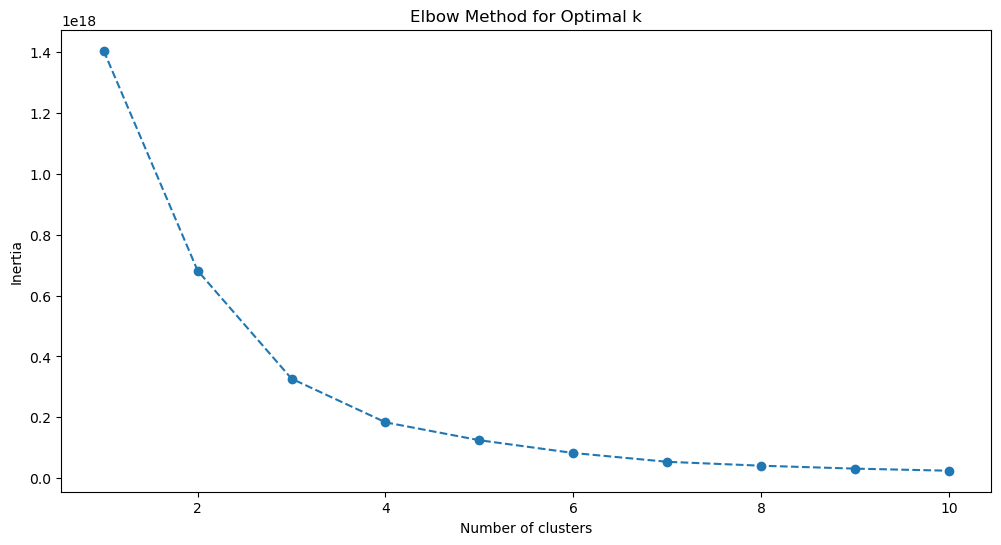

In [87]:
X = df[['Education', 'Income', 'Total_spending', 'status_Lajang', 'status_Menikah', 
        'status_Bertunangan', 'status_Cerai', 'status_Duda', 'status_Janda', 'status_Lajang', 'status_Menikah', 
        'Age_Category', 'NumWebPurchases', 'Response', 'NumCatalogPurchases', 'NumDealsPurchases', 'Response']]

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=100, random_state=0)
    kmeans.fit(df[['Education', 'Income', 'Total_spending', 'status_Lajang', 'status_Menikah', 
        'status_Bertunangan', 'status_Cerai', 'status_Duda', 'status_Janda', 'status_Lajang', 'status_Menikah', 'NumWebPurchases', 'Response', 'NumCatalogPurchases', 
                  'NumDealsPurchases', 'Response']])
    inertia.append(kmeans.inertia_)

# Buat visualisasi elbow plot
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [76]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

df['Year'] = df['Dt_Customer'].dt.year
df['Month'] = df['Dt_Customer'].dt.month


customer_counts_by_year = df['Year'].value_counts().reset_index()
customer_counts_by_year.columns = ['Year', 'Customer_Count']

In [90]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X) 

# Hasil klastering dapat diakses dengan kmeans.labels_
X.loc[:, 'cluster_labels'] = kmeans.labels_

In [89]:
best_score = -1 
best_k = 2 

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X)  # Ganti df dengan dataset Anda
    score = silhouette_score(X, cluster_labels)
    
    if score > best_score:
        best_score = score
        best_k = k
        
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Silhouette Score for K={k}: {silhouette_avg}")

Silhouette Score for K=10: 0.5186392124487933


In [93]:
X.head()

,Education,Income,Total_spending,status_Lajang,status_Menikah,status_Bertunangan,status_Cerai,status_Duda,status_Janda,status_Lajang,status_Menikah,Age_Category,NumWebPurchases,Response,NumCatalogPurchases,NumDealsPurchases,Response,cluster_labels
0,2,58138000.0,1617000,True,False,False,False,False,False,True,False,2,8,1,10,3,1,1
1,2,46344000.0,27000,True,False,False,False,False,False,True,False,2,1,0,1,2,0,1
2,2,71613000.0,776000,False,False,True,False,False,False,False,False,2,8,0,2,1,0,0
3,2,26646000.0,53000,False,False,True,False,False,False,False,False,0,2,0,0,2,0,3
4,4,58293000.0,422000,False,True,False,False,False,False,False,True,0,5,0,3,5,0,1


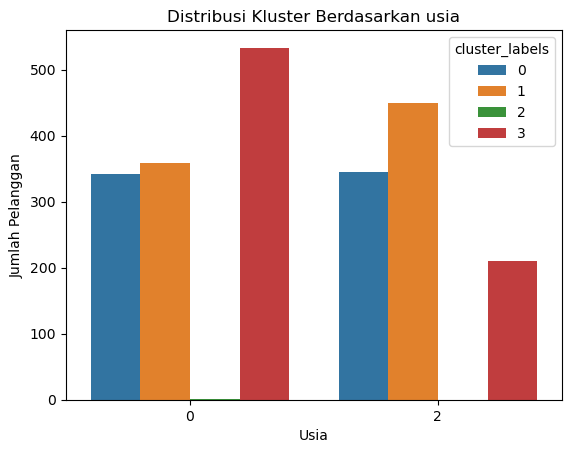

In [84]:
sns.countplot(x='Age_Category', hue='cluster_labels', data=X)
plt.title('Distribusi Kluster Berdasarkan usia')
plt.xlabel('Usia')
plt.ylabel('Jumlah Pelanggan')
plt.show()

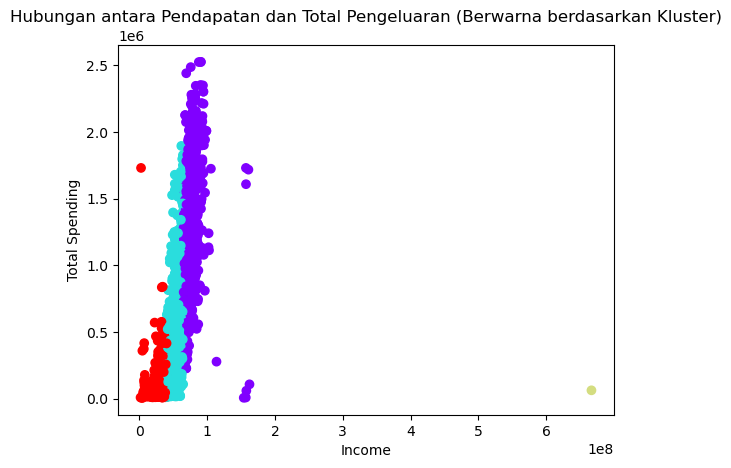

In [76]:
plt.scatter(df['Income'], df['Total_spending'], c=X['cluster_labels'], cmap='rainbow')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.title('Hubungan antara Pendapatan dan Total Pengeluaran (Berwarna berdasarkan Kluster)')
plt.show()

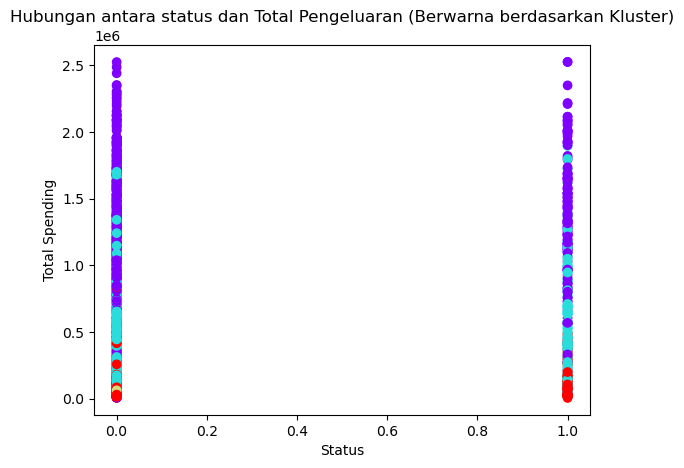

In [85]:
plt.scatter(df['status_Lajang'], df['Total_spending'], c=X['cluster_labels'], cmap='rainbow')
plt.xlabel('Status')
plt.ylabel('Total Spending')
plt.title('Hubungan antara status dan Total Pengeluaran (Berwarna berdasarkan Kluster)')
plt.show()

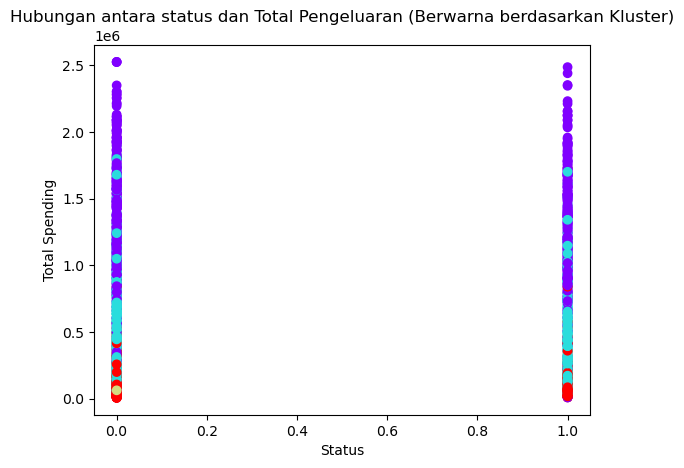

In [86]:
plt.scatter(df['status_Menikah'], df['Total_spending'], c=X['cluster_labels'], cmap='rainbow')
plt.xlabel('Status')
plt.ylabel('Total Spending')
plt.title('Hubungan antara status dan Total Pengeluaran (Berwarna berdasarkan Kluster)')
plt.show()

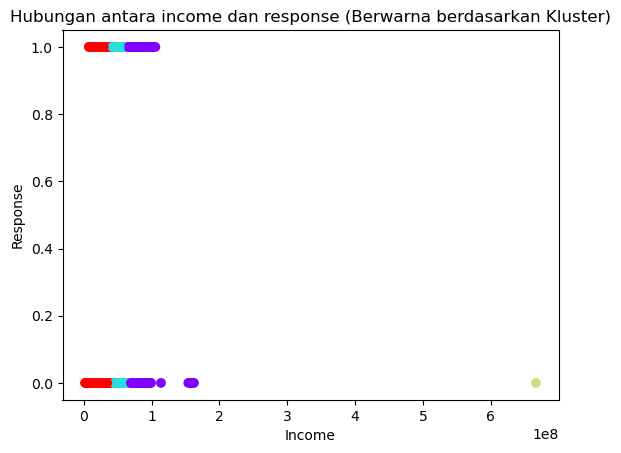

In [92]:
plt.scatter(df['Income'], df['Response'], c=X['cluster_labels'], cmap='rainbow')
plt.xlabel('Income')
plt.ylabel('Response')
plt.title('Hubungan antara income dan response (Berwarna berdasarkan Kluster)')
plt.show()

In [97]:
# Menghitung total pengeluaran per kluster
total_spending_per_cluster = X.groupby('cluster_labels')['Total_spending'].sum()

# Menghitung total pendapatan tambahan yang diharapkan jika semua pelanggan di-target ulang
conversion_rate = 0.1  # Misalnya, 10% tingkat konversi
average_additional_spending = 50  # Misalnya, rata-rata pengeluaran tambahan per pelanggan
expected_additional_revenue = total_spending_per_cluster * conversion_rate * average_additional_spending

# Menampilkan potensi dampak
print(expected_additional_revenue)

# Rekomendasi bisnis
for cluster, revenue in expected_additional_revenue.items():
    if revenue > 10000:
        print(f"Rekomendasi: Fokus pemasaran retargeting pada Kluster {cluster} dengan potensi dampak tinggi.")

cluster_labels
0    4.409575e+09
1    2.022170e+09
2    3.100000e+05
3    3.528850e+08
Name: Total_spending, dtype: float64
Rekomendasi: Fokus pemasaran retargeting pada Kluster 0 dengan potensi dampak tinggi.
Rekomendasi: Fokus pemasaran retargeting pada Kluster 1 dengan potensi dampak tinggi.
Rekomendasi: Fokus pemasaran retargeting pada Kluster 2 dengan potensi dampak tinggi.
Rekomendasi: Fokus pemasaran retargeting pada Kluster 3 dengan potensi dampak tinggi.
